## Module 6 Practice - Choropleth Maps


In this notebook, we will see examples of choropleth maps using ggplot.

Maps are represented by very detailed polygons in vector form. Let's first start with simple polygons. 

In [1]:
library(ggplot2)
library(maps)
library(ggmap)
library(mapproj)


# To color polygons, we usually need two data frames; 
# one contains the coordinates of each polygon (positions),  
# and the other one contains the values associated with each polygon (values).  
# A common variable links the two together (ids).

# Made up ids; these connect values to polygons
ids <- factor(c("1.1", "2.1", "1.2", "2.2", "1.3", "2.3"))

# Some made up values: the colors will represent these values 
values <- data.frame(id = ids, value = c(3, 3.1, 3.1, 3.2, 3.15, 3.5))

# coordinates of some polygons
positions <- data.frame(id = rep(ids, each = 4),
  x = c(2, 1, 1.1, 2.2, 1, 0, 0.3, 1.1, 2.2, 1.1, 1.2, 2.5, 1.1, 0.3,
  0.5, 1.2, 2.5, 1.2, 1.3, 2.7, 1.2, 0.5, 0.6, 1.3),
  y = c(-0.5, 0, 1, 0.5, 0, 0.5, 1.5, 1, 0.5, 1, 2.1, 1.7, 1, 1.5,
  2.2, 2.1, 1.7, 2.1, 3.2, 2.8, 2.1, 2.2, 3.3, 3.2))

head(values)
head(positions)

id,value
1.1,3.00
2.1,3.10
1.2,3.10
2.2,3.20
1.3,3.15
2.3,3.50


id,x,y
1.1,2.0,-0.5
1.1,1.0,0.0
1.1,1.1,1.0
1.1,2.2,0.5
2.1,1.0,0.0
2.1,0.0,0.5


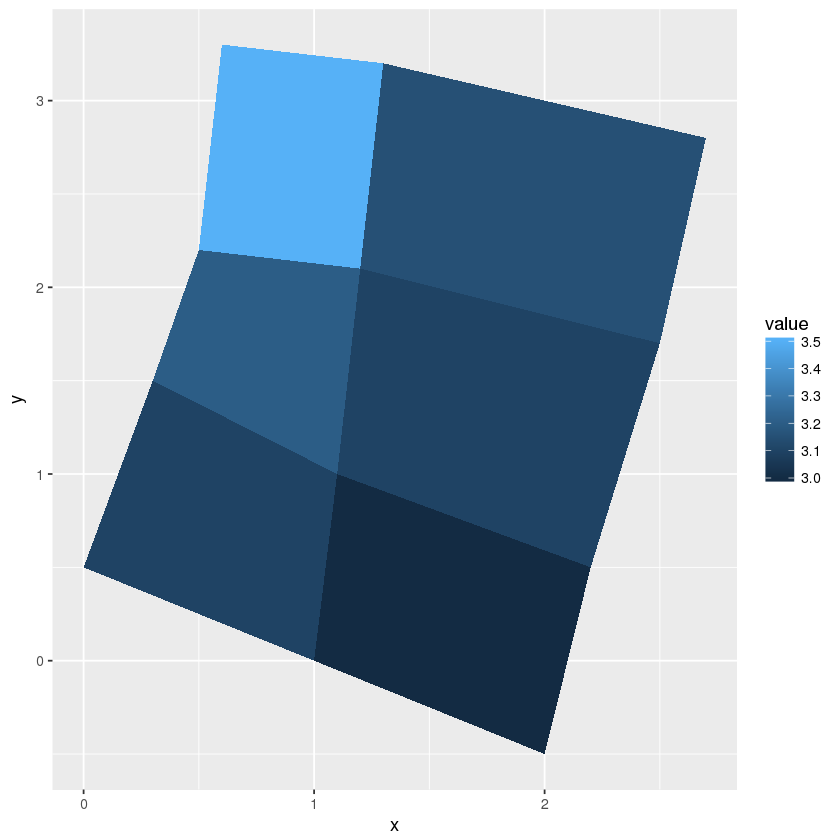

In [2]:
# Let's draw and color them: map_id=id is what associates the two data frames
ggplot(data = values, aes(fill = value)) +
# common variable is id
geom_map(aes(map_id = id), map = positions) +
expand_limits(positions)

Now, let's do the same for US map to visualize the crime data set. We need to create lowercase state names, and they will serve as the common variable between the map data and the crime data set. 

In [3]:
head(USArrests)

# First create lowercase state names, because these will be the "IDs" that will connect 
# the crimes data to the map data that also contains lowercase state names and their polygon coordinates. 
crimes <- data.frame(state = tolower(rownames(USArrests)), USArrests)
# convert arrest variables in the columns to a single column to enable faceting later. 
crimesm <- reshape2::melt(crimes[,c(1,2,3,5)], id = 1)
head(crimes)
head(crimesm)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7


,state,Murder,Assault,UrbanPop,Rape
Alabama,alabama,13.2,236,58,21.2
Alaska,alaska,10.0,263,48,44.5
Arizona,arizona,8.1,294,80,31.0
Arkansas,arkansas,8.8,190,50,19.5
California,california,9.0,276,91,40.6
Colorado,colorado,7.9,204,78,38.7


state,variable,value
alabama,Murder,13.2
alaska,Murder,10.0
arizona,Murder,8.1
arkansas,Murder,8.8
california,Murder,9.0
colorado,Murder,7.9


In [4]:
# Get the map data for US states
states_map <- map_data("state")

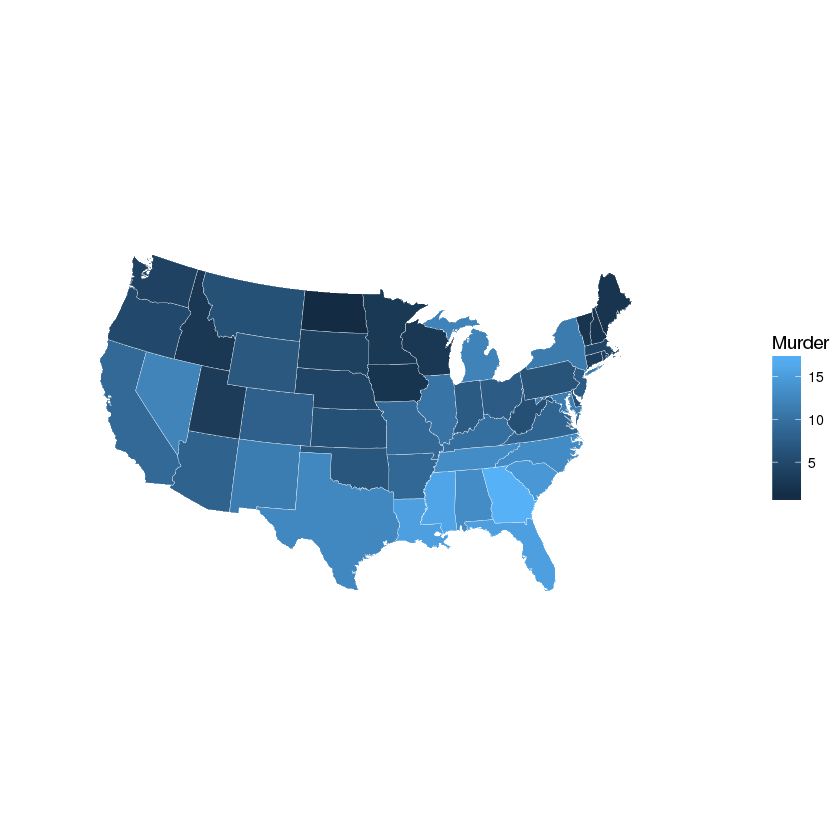

In [5]:
# "state" is the common variable (ids)
ggplot(data=crimes, aes(fill=Murder)) + 
# color will encode Murder, state boundaries will be white and size of 0.1 
geom_map(map=states_map, aes(map_id=state), color="white", size=0.1) +
# coordinate limits of the map 
expand_limits(x = states_map$long, y = states_map$lat) + 
# useful map projection 
coord_map("polyconic") +
# remove grid and coord info 
theme_void() 

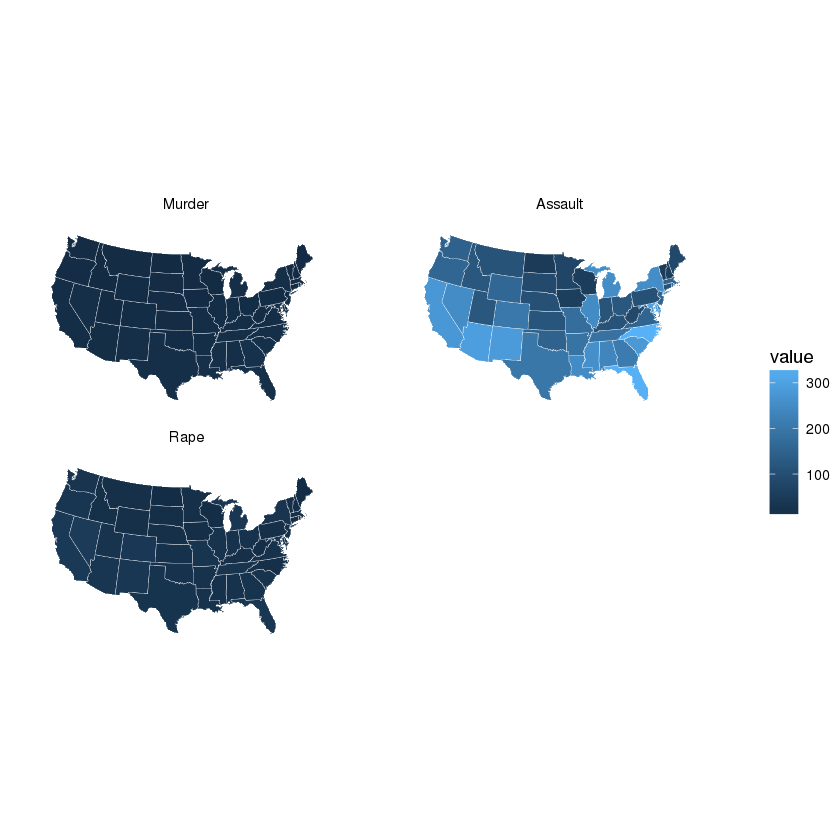

In [6]:
# Similarly, we can do small multiples 
ggplot(data=crimesm, aes(fill = value)) +
geom_map(map = states_map, aes(map_id = state), color="white", size=0.1) +
expand_limits(x = states_map$long, y = states_map$lat) +
facet_wrap(~variable, ncol=2) + 
coord_map("polyconic") +
theme_void()

In [ ]:
# Let's get another data set 
agex <- read.csv("../../../datasets/2011_us_ag_exports.csv")
head(agex)

In [ ]:
library(dplyr) 
# Let's create lowercase state names 
agex <- mutate(agex, state = tolower(state))
head(agex)

In [ ]:
# Let's draw and color them
ggplot() +
geom_map(data=agex, map = states_map, aes(fill = total.exports, map_id = state), color="white", size=0.3) +
expand_limits(x = states_map$long, y = states_map$lat) +
coord_map("polyconic") +
theme_void() +
ggtitle("US Agriculture Exports") 

In [ ]:
# Pick a few variables
sub <- agex[, c(2,14,15,16,17)]
head(sub)
# melt them into a single variable
subm <- reshape2::melt(sub, id = 1)
head(subm)

In [ ]:
ggplot(subm, aes(map_id = state)) +
geom_map(aes(fill = value), map = states_map, color="white", size=0.1) +
expand_limits(x = states_map$long, y = states_map$lat) + 
scale_fill_continuous(low='thistle2', high='darkblue') +
coord_map("polyconic") + 
facet_wrap(~variable, ncol=2) +
theme_void() +
theme(legend.position="None") + 
ggtitle("US Agriculture Exports") 


In [ ]:
# Let's compare percentages 
sub <-mutate(sub, corn=corn/sum(corn))
sub <-mutate(sub, wheat=wheat/sum(wheat))
sub <-mutate(sub, cotton=cotton/sum(cotton))
sub <-mutate(sub, total.veggies=total.veggies/sum(total.veggies))
subm <- reshape2::melt(sub, id = 1)

ggplot(subm, aes(map_id = state)) +
geom_map(aes(fill = value), map = states_map, color="white", size=0.1) +
expand_limits(x = states_map$long, y = states_map$lat) + 
scale_fill_continuous(low='thistle2', high='darkblue') +
coord_map("polyconic") + 
facet_wrap(~variable, ncol=2) +
theme_void() +
theme(legend.position="None") + 
ggtitle("US Agriculture Exports") 
